# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
city_url = url + "&q=" + city
city_url
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent=4, sort_keys=True))
city_lat = city_weather["coord"]["lat"]
city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

city_max_temp

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -51.7236,
        "lon": -72.4875
    },
    "dt": 1722885784,
    "id": 3874958,
    "main": {
        "feels_like": -1.61,
        "grnd_level": 1018,
        "humidity": 80,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 1.25,
        "temp_max": 1.25,
        "temp_min": 1.25
    },
    "name": "Puerto Natales",
    "sys": {
        "country": "CL",
        "id": 8495,
        "sunrise": 1722860390,
        "sunset": 1722893517,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 2.57
    }
}


1.25

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | singkil
Processing Record 2 of Set 1 | tomatlan
Processing Record 3 of Set 1 | usinsk
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | mantua
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | vyerkhnyadzvinsk
Processing Record 9 of Set 1 | al fuwayliq
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | igarka
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | el calafate
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | slave lake
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,singkil,-7.9855,111.4161,20.94,93,100,1.86,ID,1722885784
1,tomatlan,19.9333,-105.2500,34.21,49,24,3.01,MX,1722885786
2,usinsk,65.9939,57.5281,10.25,72,99,5.75,RU,1722885787
3,edinburgh of the seven seas,-37.0676,-12.3116,13.74,91,92,11.02,SH,1722885788
4,longyearbyen,78.2186,15.6401,9.91,81,20,6.17,SJ,1722885789


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,singkil,-7.9855,111.4161,20.94,93,100,1.86,ID,1722885784
1,tomatlan,19.9333,-105.2500,34.21,49,24,3.01,MX,1722885786
2,usinsk,65.9939,57.5281,10.25,72,99,5.75,RU,1722885787
3,edinburgh of the seven seas,-37.0676,-12.3116,13.74,91,92,11.02,SH,1722885788
4,longyearbyen,78.2186,15.6401,9.91,81,20,6.17,SJ,1722885789


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

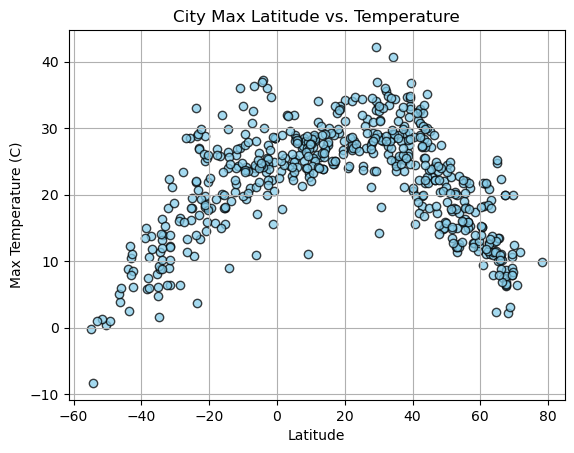

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="skyblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

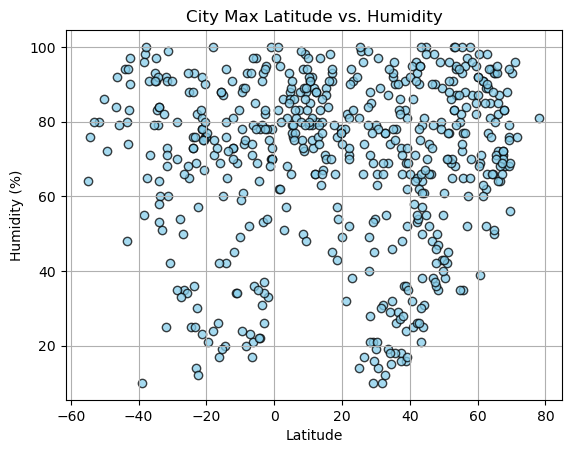

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="skyblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

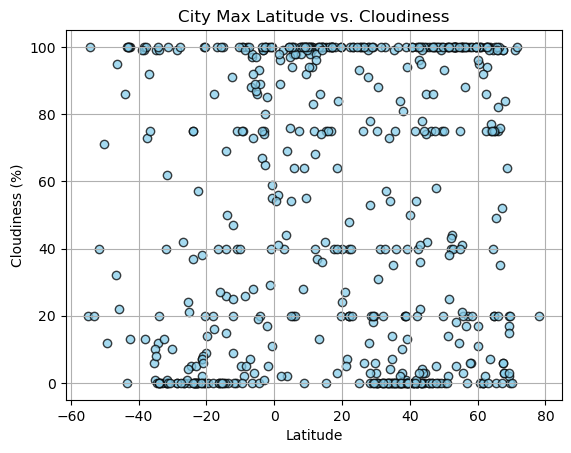

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="skyblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

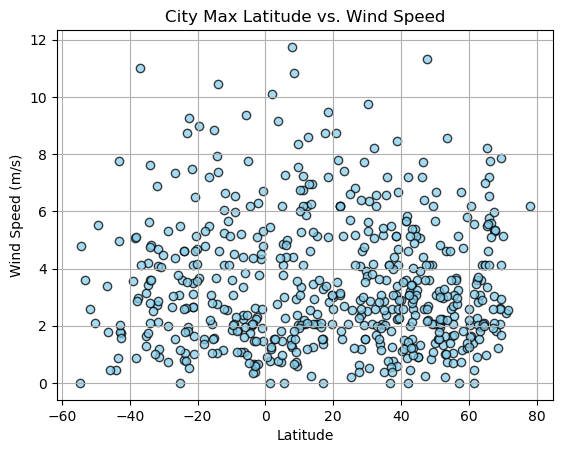

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="skyblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tomatlan,19.9333,-105.2500,34.21,49,24,3.01,MX,1722885786
2,usinsk,65.9939,57.5281,10.25,72,99,5.75,RU,1722885787
4,longyearbyen,78.2186,15.6401,9.91,81,20,6.17,SJ,1722885789
5,mantua,45.1667,10.7833,29.53,70,42,0.89,IT,1722885790
7,vyerkhnyadzvinsk,55.7815,27.9443,18.16,77,100,2.33,BY,1722885792


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,singkil,-7.9855,111.4161,20.94,93,100,1.86,ID,1722885784
3,edinburgh of the seven seas,-37.0676,-12.3116,13.74,91,92,11.02,SH,1722885788
6,grytviken,-54.2811,-36.5092,-8.31,76,100,4.80,GS,1722885644
12,waitangi,-43.9535,-176.5597,8.79,94,86,0.45,NZ,1722885799
13,arraial do cabo,-22.9661,-42.0278,26.98,69,0,8.75,BR,1722885788


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4314168174892855


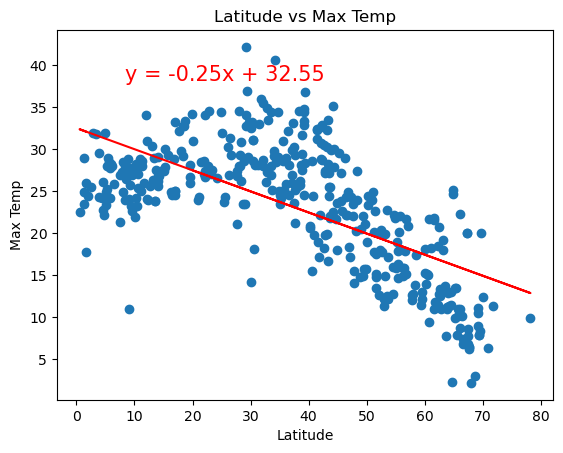

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
x_annotate = x_values.min() + (x_values.max() - x_values.min()) * 0.1
y_annotate = y_values.min() + (y_values.max() - y_values.min()) * 0.9
plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()



The r-squared is: 0.5244934208886788


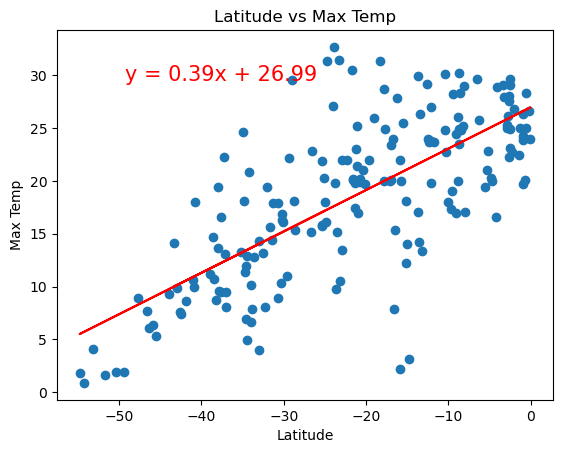

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
x_annotate = x_values.min() + (x_values.max() - x_values.min()) * 0.1
y_annotate = y_values.min() + (y_values.max() - y_values.min()) * 0.9
plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere Latitude vs Max Temp with an r-squred value of 43% shows that 43% of the variability on the max temp of the city is explained by the latitude. In the Souther Hemisphere, the r-squared value is 52% meaning that 52% of the variability of the max temp is explained by the latitude. Both models indicate that the data is a moderate fit; however, additional factors would help explain the max temp of the city versus latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00033634401067511913


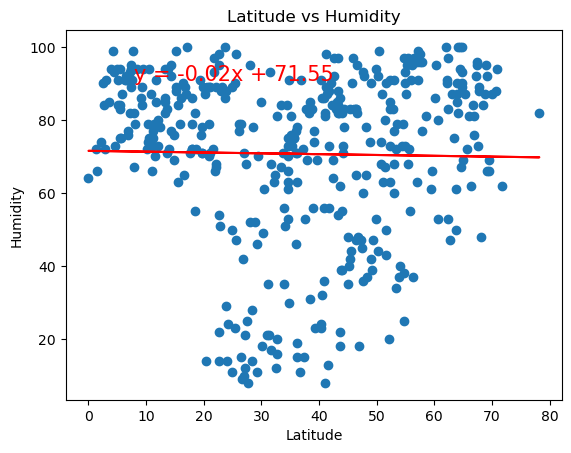

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
x_annotate = x_values.min() + (x_values.max() - x_values.min()) * 0.1
y_annotate = y_values.min() + (y_values.max() - y_values.min()) * 0.9
plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0006771218842569827


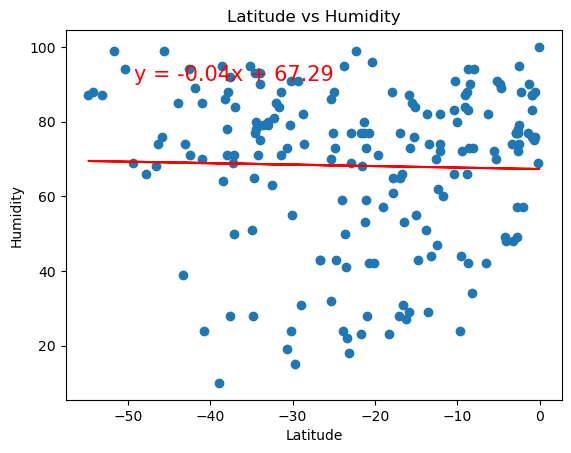

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
x_annotate = x_values.min() + (x_values.max() - x_values.min()) * 0.1
y_annotate = y_values.min() + (y_values.max() - y_values.min()) * 0.9
plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** For both the Northern and Southern Hemispheres on Latitude vs Humidity, both sets of data have an r-squred value of less 0% indicating the latitude explaines none of the variability on the humidity of the city. Other factors will need to be considered to understand the humidity levels for the city. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.023186386669225883


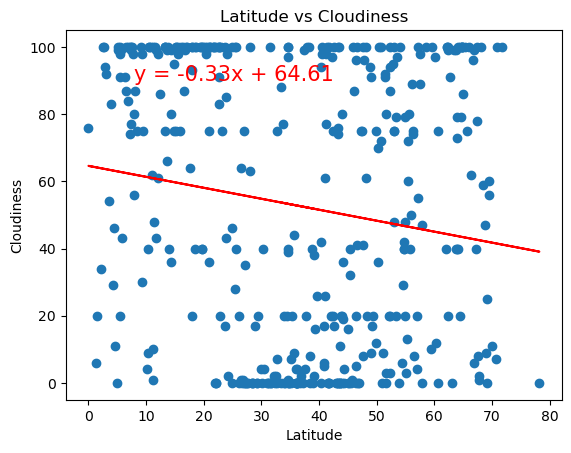

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
x_annotate = x_values.min() + (x_values.max() - x_values.min()) * 0.1
y_annotate = y_values.min() + (y_values.max() - y_values.min()) * 0.9
plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.002217149364610757


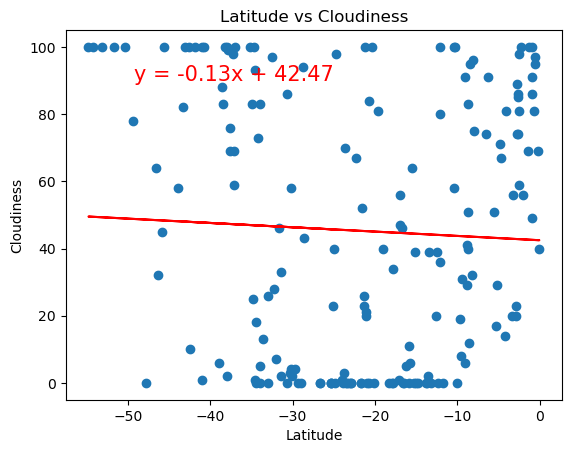

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
x_annotate = x_values.min() + (x_values.max() - x_values.min()) * 0.1
y_annotate = y_values.min() + (y_values.max() - y_values.min()) * 0.9
plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The r-squared value for the Norther Hemisphere on Latitude vs Cloudiness is 2.3% and the r-squared value for the Souther Hemipshere is less than 0% indicating the latitude of the city does not explain the level of cloudiness for the city. Other factors will need to be considered. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.018257434607308585


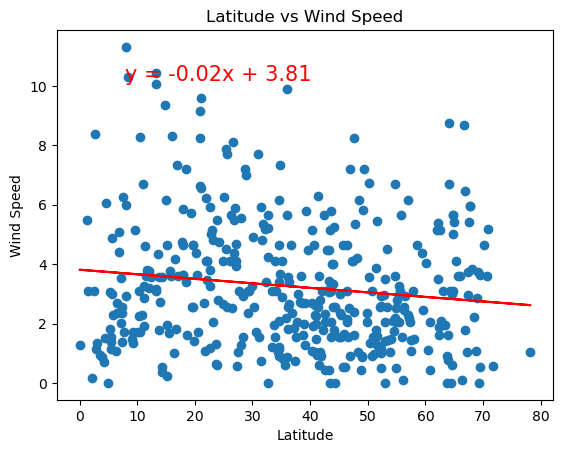

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
x_annotate = x_values.min() + (x_values.max() - x_values.min()) * 0.1
y_annotate = y_values.min() + (y_values.max() - y_values.min()) * 0.9
plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.008977261523869065


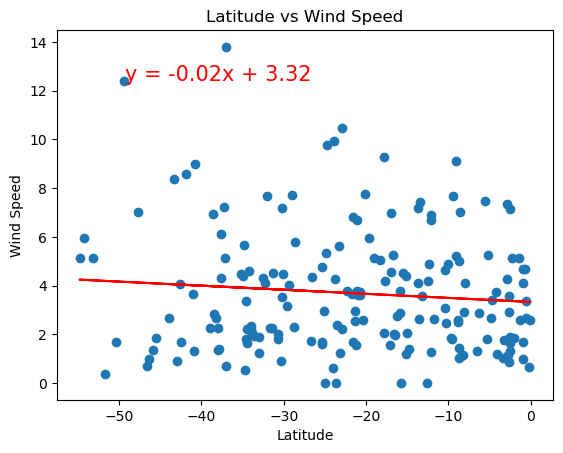

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
x_annotate = x_values.min() + (x_values.max() - x_values.min()) * 0.1
y_annotate = y_values.min() + (y_values.max() - y_values.min()) * 0.9
plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The Norther Hemisphere has an r-squared value of 1.8% while the Southern Hemisphere has an r-squared value of less than 0% on Latitude vs Wind Speed. This indicates that wind speed of the city is not explained by the latitude of the city. Other factors will need to be considered. 